In [2]:
import torch
import torch.nn as nn

import numpy as np

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

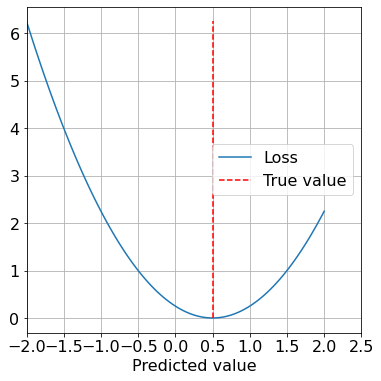

In [3]:
lossfunMSE = nn.MSELoss()

yHat = torch.linspace(-2, 2, 101)
y = torch.tensor(0.5)

L = np.zeros(101)
for i, yy in enumerate(yHat):
    L[i] = lossfunMSE(yy, y)

plt.figure(figsize = (6, 6))
plt.plot(yHat, L, label = 'Loss')
plt.plot([y,y],[0, np.max(L)], 'r--', label = 'True value')
plt.xlabel('Predicted value')
plt.legend()
plt.grid()
plt.xlim([-2, 2])
plt.xticks(np.arange(-2, 3, 0.5))
plt.show()
    


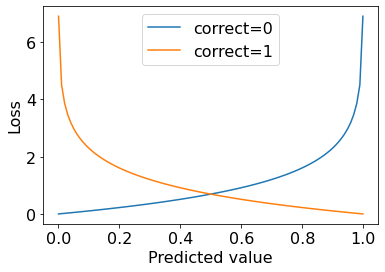

In [6]:
# BCE loss function
lossfunBCE = nn.BCELoss()

yHat = torch.linspace(0.001, 0.999, 101)
y1 = torch.tensor(0.)
y2 = torch.tensor(1.)

# Compute BCE loss
L = np.zeros((101, 2))
for i,yy in enumerate(yHat):
    L[i,0] = lossfunBCE(yy, y1)
    L[i,1] = lossfunBCE(yy, y2)

plt.plot(yHat, L)
plt.xlabel('Predicted value')
plt.ylabel('Loss')
plt.legend(['correct=0', 'correct=1'])
#plt.yscale('log')
plt.show()

In [10]:
yHat = torch.tensor(2.)
#print(lossfunBCE(yHat, y2)) # lossfunBCE needs all the outputs between 0 and 1

sigmoid = nn.Sigmoid()
print(lossfunBCE(sigmoid(yHat), y2))

tensor(0.1269)


In [11]:
lossfunBCELogit = nn.BCEWithLogitsLoss()
print(lossfunBCELogit(yHat, y2))

tensor(0.1269)


In [16]:
# Loss function
lossfunCCE = nn.CrossEntropyLoss()

yHat = torch.tensor([[1., 4, 3]])
for i in range(3):
    correctAnswer = torch.tensor([i])
    print(torch.tensor([i]))
    thisloss = lossfunCCE(yHat, correctAnswer).item()
    print('Loss when correct answer is %g: %g' %(i, thisloss))

tensor([0])
Loss when correct answer is 0: 3.34901
tensor([1])
Loss when correct answer is 1: 0.349012
tensor([2])
Loss when correct answer is 2: 1.34901


In [17]:
sm = nn.Softmax(dim=1)
yHat_sm = sm(yHat)

sm = nn.LogSoftmax(dim = 1)
yHat_logsm = sm(yHat)

print(yHat)
print(yHat_sm)
print(yHat_logsm)

tensor([[1., 4., 3.]])
tensor([[0.0351, 0.7054, 0.2595]])
tensor([[-3.3490, -0.3490, -1.3490]])


In [18]:
class myLoss(nn.Module):
    def __init__(self):
        super().__init__()
    
    def forward(self, x, y):
        loss = torch.abs(x-y)
        return loss
    
lfun = myLoss()
lfun(torch.tensor(4), torch.tensor(5.2))

tensor(1.2000)